# Project 1    Final Analysis                                  
### Documented Colon Cancer Diagnoses (excluding rectum) in the the United States 2005-2022
---


 

## Set up

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from matplotlib.ticker import MaxNLocator
import os
import seaborn as sns

In [81]:
# Load the dataset
file_path = "/Users/alyssaberridge/Desktop/Projects/Project-1/Resources/Modified_Cleaned_Cancer_Project.csv"
df = pd.read_csv(file_path)
# Display the first few rows
df.head()

,Race,Sex,Year,Age,In the natural position of diagnosis,Localized,Regional,Distant,Unknown Stage,Blanks/ Meets NO requirements as whole
0,White,Male/Female,2000,<1 year,1,3,1,0,0,0
1,White,Male/Female,2000,01-04 years,0,2,0,0,0,0
2,White,Male/Female,2000,05-09 years,0,43,13,0,0,1
3,White,Male/Female,2000,10-14 years,0,247,72,14,4,14
4,White,Male/Female,2000,15-19 years,8,484,179,45,21,42


In [132]:
# Create output directory 
output_dir = "/Users/alyssaberridge/Desktop/Projects/Project-1/output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [83]:
# available columns
df.columns

Index(['Race', 'Sex', 'Year', 'Age', 'In the natural position of diagnosis',
       'Localized', 'Regional', 'Distant', 'Unknown Stage',
       'Blanks/ Meets NO requirements as whole'],
      dtype='object')

In [121]:
# Unfiltered table results 
# Group by 'Year' and sum the 'Regionals' column
cases_per_year = df.groupby('Year')['Regional'].sum().reset_index()

# Display the resulting table
print(cases_per_year)


    Year  Regional
0   2000    615760
1   2001         0
2   2002         0
3   2003         0
4   2004         0
5   2005     38118
6   2006     36364
7   2007     35882
8   2008     36172
9   2009     35816
10  2010     34764
11  2011     33698
12  2012     32988
13  2013     32806
14  2014     32280
15  2015     32126
16  2016     32092
17  2017     35214
18  2018     34414
19  2019     32458
20  2020     33912
21  2021     31302
22  2022     35354


# All visuals for Total Documented Cases per year

## Table 

In [85]:
# Cleaned Regional documented cases per year
# Clean up the 'Sex' column by removing 'Male/Female'  available columns
df_cleaned = df[df["Sex"] != "Male/Female"] 

#The the Sum of Regional per year 
df_cleaned.groupby("Year")["Regional"].sum()


Year
2000    307880
2001         0
2002         0
2003         0
2004         0
2005     19059
2006     18182
2007     17941
2008     18086
2009     17908
2010     17382
2011     16849
2012     16494
2013     16403
2014     16140
2015     16063
2016     16046
2017     17607
2018     17207
2019     16229
2020     16956
2021     15651
2022     17677
Name: Regional, dtype: int64

## Bar Graph 

In [91]:
# Creating a bar graph for Regional cases overtime per year with whole numbers starting from 2005
# Clean up the 'Sex' column by removing 'Male/Female'
df_cleaned = df[df["Sex"] != "Male/Female"]  

# Exclude the years 2000 to 2004
df_cleaned = df_cleaned[(df_cleaned["Year"] < 2000) | (df_cleaned["Year"] > 2004)]

# Group by 'Year' and sum Regional (now using cleaned data)
df_cleaned.groupby("Year")["Regional"].sum().plot(kind="bar", figsize=(12, 6), width=0.5)

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel(" Total Regional Cases")
plt.title("Regional Diagnoses Per Year")

# Format the y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Only gridlines for y-axis
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Save the bar graph
plt.savefig(os.path.join(output_dir, "Per_year_Regional_diagnoses_Bar_Graph.png"))
plt.close()

# Show the plot
plt.show()

## Line graph 

In [92]:
#creating a line graph of Regional cases overtime per year with whole numbers starting from 2005
#single year brakets 
# Group by 'Year' and sum 'Regional Cases' (now using cleaned data)
df_cleaned.groupby("Year")["Regional"].sum().plot(kind="line", marker="o", figsize=(10, 5))

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Trend of Regional Diagnoses Over Time")

# Format the y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability
plt.grid(True)

# Save the line graph
plt.savefig(os.path.join(output_dir, "Per_year_Regional_diagnoses_Line_Graph.png"))
plt.close()

plt.show()

## Trend line 

In [93]:
#creating a Trendline of Regional cases overtime per year with whole numbers starting from 2005
# Group by 'Year' and sum 'Total Documented Cases'
df_yearly_cases = df_cleaned.groupby("Year")["Regional"].sum()

# Plot the Regional cases as a line graph with markers
plt.figure(figsize=(10, 5))
plt.plot(df_yearly_cases.index, df_yearly_cases.values, marker="o", label="Regional")

# Calculate the trend line (linear regression)
slope, intercept, r_value, p_value, std_err = linregress(df_yearly_cases.index, df_yearly_cases.values)

# Create the trend line
trend_line = slope * df_yearly_cases.index + intercept

# Plot the trend line
plt.plot(df_yearly_cases.index, trend_line, linestyle='--', color='red', label='Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Trend of Regional Diagnoses Over Time with Trend Line")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Legend", fontsize=10, title_fontsize=12)

# Add gridlines 
plt.grid(True)

# Save the trend line graph
plt.savefig(os.path.join(output_dir, "Per_year_Regional_diagnoses_with_trend_line.png"))
plt.close()

# Show the plot
plt.show()



# Visuals for each stage of diagnosis per year

## Table 

In [25]:
# Cleaned Table for each stage diagnosed per year starting at 20005
# Group by 'Year' and sum the different stages
stages_columns = ['In the natural position of diagnosis', 'Localized', 'Regional', 'Distant', 'Unknown Stage']

# Group by Year and sum the stages
df_stages = df_cleaned.groupby("Year")[stages_columns].sum()


print(df_stages)

      In the natural position of diagnosis  Localized  Regional  Distant  \
Year                                                                       
2005                                  3131      19102     19059    10085   
2006                                  3025      19472     18182     9897   
2007                                  2848      19445     17941     9901   
2008                                  2711      19374     18086     9765   
2009                                  2473      19854     17908    10079   
2010                                  2413      19158     17382     9906   
2011                                  2096      18135     16849    10227   
2012                                  1744      18052     16494    10172   
2013                                  1950      18115     16403    10162   
2014                                  2044      17960     16140     9968   
2015                                  1627      18727     16063    10645   
2016        

## Bar graph 

In [100]:
#Creating a bar graph for each stage diagnosed per year NOT stacked starting from 2005
# Plot the grouped bar chart (side-by-side bars for each stage)
ax = df_stages.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='tab20', edgecolor='none')

# Add labels and title
ax.set_xlabel("Year of Diagnosis", fontsize=14)
ax.set_ylabel("Total Cases by Stage", fontsize=14)
ax.set_title("Cancer Diagnoses at Various Stages Per Year", fontsize=16)

# Format the y-axis to show whole numbers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Improve the legend 
ax.legend(title="Cancer Stages", title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Adjust layout to prevent overlap and make the plot more aesthetically pleasing
plt.tight_layout()

# Save 
plt.savefig(os.path.join(output_dir, "Stages_per_year_Regional_diagnoses_BarGraph.png"))
plt.close()

# Show the plot
plt.show()



## Line graph 

In [101]:
# Creating a line graph for each stage diagnosed per year starting from 2005
# Plot each stage as a separate trend line
plt.figure(figsize=(12, 6))
for column in stages_columns:
    plt.plot(df_stages.index, df_stages[column], marker="o", label=column)

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Cases by Stage")
plt.title("Cancer Diagnos at various stages Over Time")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  

# Add a legend
plt.legend(title="Cancer Stage", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Set the y-axis limits (start at 1500, stop at 30000)
plt.ylim(0, 22000)

# Save 
plt.tight_layout()  
plt.savefig(os.path.join(output_dir, "Stages_per_year_Regional_diagnoses_LineGraph.png"))
plt.close() 

# Show the plot
plt.show()


## Trend line 

In [102]:
# creating a trend line for Each stage diagnosed per year starting from 2005
# Plot each stage as a separate trend line
plt.figure(figsize=(12, 6))

for column in stages_columns:
    # Plot the data points for each stage
    plt.plot(df_stages.index, df_stages[column], marker="o", label=column)
    
    # Calculate the trend line (linear regression)
    slope, intercept, r_value, p_value, std_err = linregress(df_stages.index, df_stages[column])
    
    # Create the trend line
    trend_line = slope * df_stages.index + intercept
    
    # Plot the trend line
    plt.plot(df_stages.index, trend_line, linestyle='--', label=f'{column} Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Cases by Stage")
plt.title("Cancer Diagnoses at Various Stages Over Time with Trend Lines")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Cancer Stage", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Set the y-axis limits (start at 1500, stop at 30000)
plt.ylim(0, 22000)

# Save the trend line graph
plt.savefig(os.path.join(output_dir, "Stages_per_year_Regional_diagnoses_Trendline.png"))
plt.close()

# Show the plot
plt.show()


# All visuals of number of cases per race per year

## Table

In [29]:
#Table of the number of cases per year per race 
# Group by 'Year' and 'Race' and sum 'Total Documented Cases'
df_race_year = df_cleaned.groupby(["Year", "Race"])["Regional"].sum()

print (df_race_year)


Year  Race  
2005  Black     8099
      Others    1063
      White     9897
2006  Black     7727
      Others     996
      White     9459
2007  Black     7614
      Others     989
      White     9338
2008  Black     7584
      Others    1071
      White     9431
2009  Black     7570
      Others     990
      White     9348
2010  Black     7312
      Others     991
      White     9079
2011  Black     7031
      Others    1003
      White     8815
2012  Black     6873
      Others     956
      White     8665
2013  Black     6767
      Others    1024
      White     8612
2014  Black     6693
      Others     973
      White     8474
2015  Black     6693
      Others     923
      White     8447
2016  Black     6642
      Others     965
      White     8439
2017  Black     7278
      Others    1036
      White     9293
2018  Black     7041
      Others    1028
      White     9138
2019  Black     6650
      Others     976
      White     8603
2020  Black     6952
      Others    1047


## Line graph 

In [103]:
#Creating a line graph number for of Regional cases per race per year 
# Group by 'Year' and 'Race' and sum 'Total Documented Cases'
df_race_year = df_cleaned.groupby(["Year", "Race"])["Regional"].sum().unstack()

# Plot the data (you can adjust kind='line' or kind='bar' for the desired plot style)
df_race_year.plot(kind='line', figsize=(12, 6), marker="o")

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Total Regional Cases Per Race Per Year")

# Formatting y-axis to show whole numbers (integers)
from matplotlib.ticker import MaxNLocator
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Race", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save 
plt.savefig(os.path.join(output_dir, "Race_per_year_Regional_diagnoses_lineGraph.png"))
plt.close()

# Show the plot
plt.show()


## Bar graph

In [ ]:
#Creating a bar graph for the number of Regional cases per year per race
# Group by 'Year' and 'Race' and sum Regional
df_race_year = df_cleaned.groupby(["Year", "Race"])["Regional"].sum().unstack()

# Plot the data as a bar graph
df_race_year.plot(kind='bar', stacked=False, figsize=(12, 6))

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Total Regional Cases Per Race Per Year")

# Formatting y-axis to show whole numbers (integers)
from matplotlib.ticker import MaxNLocator
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Race", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Save 
plt.savefig(os.path.join(output_dir, "Race_per_year_Regional_diagnoses_BarGraph.png"))
plt.close()


# Show the plot
plt.show()


## Trend line

In [ ]:
# Creating a trend line for  Regional Diagnosis for Ethnicities per year 
# Group by 'Year' and 'Race' and sum 'Regional'
df_race_year = df_cleaned.groupby(["Year", "Race"])["Regional"].sum().unstack()

# Plot the data for each race (with markers)
plt.figure(figsize=(12, 6))
df_race_year.plot(kind='line', marker="o", ax=plt.gca())

# Add trend lines for each race
for race in df_race_year.columns:
    # Get the data for this race
    race_data = df_race_year[race].dropna()  # Remove any NaN values
    
    # Perform linear regression (find the slope and intercept)
    slope, intercept, r_value, p_value, std_err = linregress(race_data.index, race_data.values)
    
    # Calculate the trend line for the race
    trend_line = slope * race_data.index + intercept
    
    # Plot the trend line for the race (dashed line)
    plt.plot(race_data.index, trend_line, linestyle='--', label=f'{race} Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Total Regional Cases Per Race Per Year with Trend Lines")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(ticks=df_cleaned["Year"].unique(), rotation=45)  # Ensures each year is a tick, rotated for better readability

# Add a legend
plt.legend(title="Race & Trend Line", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save 
plt.savefig(os.path.join(output_dir, "Race_per_year_Regional_diagnoses_trendline.png"))
plt.close()

# Show the plot
plt.show()


# All Visuals for Sex

## Table 

In [41]:
# Table for Regional cases per year per sex
# Group by 'Year' and 'Sex' and sum 'Regionals'
df_sex_year = df_cleaned.groupby(["Year", "Sex"])["Regional"].sum().unstack()

print(df_sex_year)

Sex   Female  Male
Year              
2005    9698  9361
2006    9327  8855
2007    9454  8487
2008    9233  8853
2009    9170  8738
2010    8985  8397
2011    8715  8134
2012    8527  7967
2013    8389  8014
2014    8058  8082
2015    8216  7847
2016    8020  8026
2017    9010  8597
2018    8757  8450
2019    8142  8087
2020    8462  8494
2021    7979  7672
2022    9037  8640


## Bar Graph

In [106]:
# creating a bar graph  for Regional cases per year per sex
# Group by 'Year' and 'Sex' and sum Regional
df_sex_year = df_cleaned.groupby(["Year", "Sex"])["Regional"].sum().unstack()

# Plot a bar graph
df_sex_year.plot(kind='bar', figsize=(12, 6), stacked=False)

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Total Regional Cancer Cases Per Year Per Sex")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each year in the data
plt.xticks(rotation=45)

# Add a legend
plt.legend(title="Sex", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Save 
plt.savefig(os.path.join(output_dir, "Sex_per_year_Regional_diagnoses_BarGraph.png"))
plt.close()

# Show the plot
plt.show()


## Pie chart

In [110]:
# Group by 'Sex' and sum 'Regional' cases (across all years)
df_sex_total = df_cleaned.groupby('Sex')['Regional'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_sex_total, labels=df_sex_total.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20').colors)

# Add title
plt.title("Distribution of Regional Cancer Cases by Sex")

# Save 
plt.savefig(os.path.join(output_dir, "Sex_per_year_Regional_diagnoses_Piechart.png"))
plt.close()

# Show the plot
plt.show()



## Line graph 

In [111]:
# creating a trend line for Regional cases per year per sex
# Group by 'Year' and 'Sex' and sum 'Total Documented Cases'
df_sex_year = df_cleaned.groupby(["Year", "Sex"])["Regional"].sum().unstack()

# Plot a line graph
df_sex_year.plot(kind='line', figsize=(12, 6), marker="o")

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Total Regional Cancer Cases Per Year Per Sex")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each individual year
plt.xticks(df_sex_year.index, rotation=45)

# Add a legend
plt.legend(title="Sex", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save 
plt.savefig(os.path.join(output_dir, "Sexs_per_year_Regional_diagnoses_linegraph.png"))
plt.close()

# Show the plot
plt.show()



## Trend line 

In [ ]:
#For only males 
# Filter the data to include only males
df_male = df_cleaned[df_cleaned["Sex"] == "Male"]

# Group by 'Year' and sum Regional for males only
df_male_year = df_male.groupby("Year")["Regional"].sum()

# Plot the original data for males
plt.figure(figsize=(12, 6))
plt.plot(df_male_year.index, df_male_year, marker="o", label="Male")

# Calculate the trend line (linear regression) for males
slope, intercept, r_value, p_value, std_err = linregress(df_male_year.index, df_male_year)

# Create the trend line for males
trend_line = slope * df_male_year.index + intercept

# Plot the trend line for males
plt.plot(df_male_year.index, trend_line, linestyle='--', label='Male Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Total Regional Cancer Cases for Males Per Year with Trend Line")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each individual year
plt.xticks(df_male_year.index, rotation=45)

# Add a legend
plt.legend(title="Sex", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save 
plt.savefig(os.path.join(output_dir, "Sex_male_per_year_Regional_diagnoses_trendline.png"))
plt.close()


# Show the plot
plt.show()


In [113]:
# Female only
# Filter the data to include only females
df_female = df_cleaned[df_cleaned["Sex"] == "Female"]

# Group by 'Year' and sum Regional for females only
df_female_year = df_female.groupby("Year")["Regional"].sum()

# Plot the original data for females
plt.figure(figsize=(12, 6))
plt.plot(df_female_year.index, df_female_year, marker="o", label="Female")

# Calculate the trend line (linear regression) for females
slope, intercept, r_value, p_value, std_err = linregress(df_female_year.index, df_female_year)

# Create the trend line for females
trend_line = slope * df_female_year.index + intercept

# Plot the trend line for females
plt.plot(df_female_year.index, trend_line, linestyle='--', label='Female Trend Line')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Total Regional Cancer Cases for Females Per Year with Trend Line")

# Formatting y-axis to show whole numbers (integers)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-ticks to show each individual year
plt.xticks(df_female_year.index, rotation=45)

# Add a legend
plt.legend(title="Sex", fontsize=10, title_fontsize=12)

# Add gridlines for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Save 
plt.savefig(os.path.join(output_dir, "Sex_female_per_year_Regional_diagnoses_trendline.png"))
plt.close()

# Show the plot
plt.show()


## All visuals for Age

## Table

In [114]:
# table for Regional cases by age per year
# Group by 'Year' and 'Age', then sum the Regional Cases'
df_age_year = df_cleaned.groupby(["Year", "Age"])["Regional"].sum().unstack()

# Display the resulting table
print(df_age_year)


Age   01-04 years  05-09 years  10-14 years  15-19 years  20-24 years  \
Year                                                                    
2000            0           24          139          342          649   
2001            0            0            0            0            0   
2002            0            0            0            0            0   
2003            0            0            0            0            0   
2004            0            0            0            0            0   
2005            0            0            0           12           26   
2006            0            0            0           11           23   
2007            0            0            4            7           33   
2008            0            0            1            4           28   
2009            0            0            2            5           21   
2010            0            0            0            4           23   
2011            0            0            4        

## Bar Graph

In [ ]:
#  Bar graph of Regionald cases of cancer per year per age group for the most recent five years 

# Filter the index of df_age_year to include only years between 2018 and 2022
df_age_year_filtered = df_age_year[df_age_year.index.get_level_values('Year').isin([2018, 2019, 2020, 2021, 2022])]

# Plotting the grouped bar chart (side-by-side bars for each age group)
ax = df_age_year_filtered.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='tab20', edgecolor='none')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Documented Cases")
plt.title("Cancer Diagnoses by Age Group (2018-2022)")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)


# Save 
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Age_Per_Year_Regional_diagnoses_5yr_BarGraph.png"))
plt.close()

# Show the plot
plt.tight_layout()
plt.show()




<Figure size 640x480 with 0 Axes>

In [ ]:
# Bar graph Regional cases per age group 
# Group by 'Age' and sum 'Total Documented Cases'
df_age_cases = df_cleaned.groupby('Age')['Regional'].sum()

# Plotting the bar chart with Regional cases against age
ax = df_age_cases.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='tab20', edgecolor='none')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Total Regional Cases")
plt.title("Cancer Regional by Age")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)


# Save 
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Age_by_Regional_diagnoses_BarGraph.png"))
plt.close()

# Show the plot
plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

## Line Graph

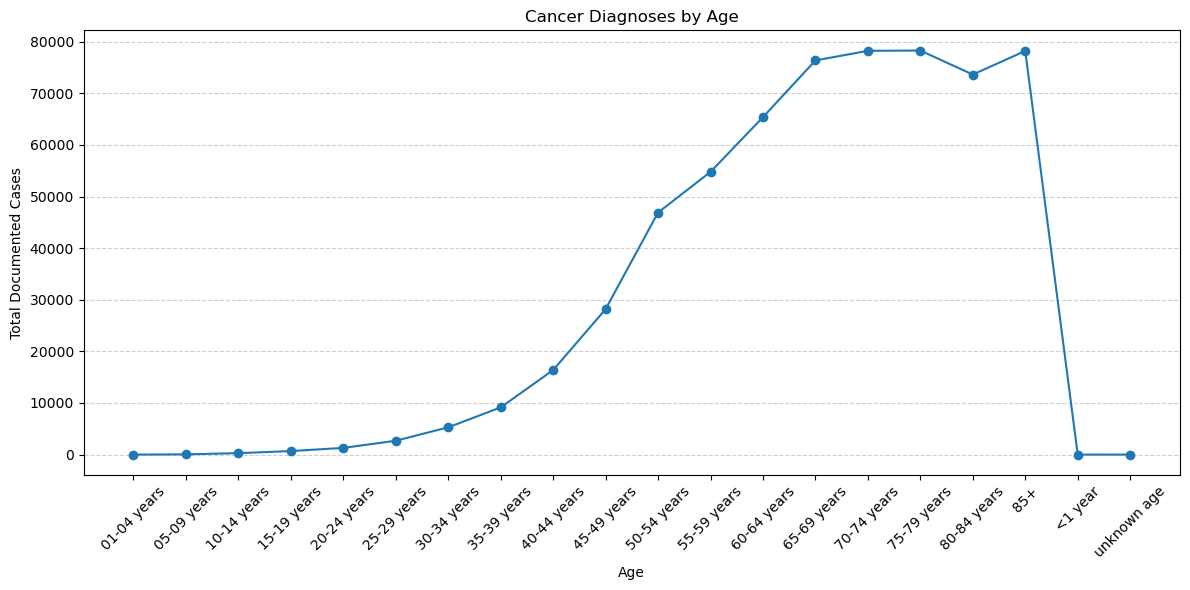

In [124]:

# Plotting the line graph with Regional cases against age
ax = df_age_cases.plot(kind='line', figsize=(12, 6), marker='o', colormap='tab20')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Total Documented Cases")
plt.title("Cancer Diagnoses by Age")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Ensure that each unique age value is shown on the x-axis
plt.xticks(ticks=range(len(df_age_cases.index)), labels=df_age_cases.index, rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)

# Save 
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Age_by_Regional_diagnoses_lineGraph.png"))
plt.close()

# Show the plot
plt.tight_layout()
plt.show()

In [133]:
# line graph for ages 50-85+ Regional cases by year
# Filter the DataFrame for age groups between 50 and 85+

# Exclude the years 2000 to 2004
df_cleaned = df_cleaned[(df_cleaned["Year"] < 2000) | (df_cleaned["Year"] > 2004)]

df_filtered = df_cleaned[df_cleaned['Age'].isin(['50-54 years', '55-59 years', '60-64 years', '65-69 years', '70-74 years', '75-79 years', '80-84 years', '85+ years'])]

# Group the filtered data by 'Year' and 'Age', then sum the 'Regional' cases
df_age_year = df_filtered.groupby(['Year', 'Age'])['Regional'].sum().unstack().fillna(0)

# Plotting the line graph
ax = df_age_year.plot(kind='line', figsize=(12, 6), marker='o', colormap='tab20')

# Add labels and title
plt.xlabel("Year of Diagnosis")
plt.ylabel("Total Regional Cases")
plt.title("Cancer Diagnoses by Age Group per Year")

# Format the y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visibility
plt.grid(True, axis='y', linestyle="--", alpha=0.6)


# Save 
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Age_Regional_diagnoses_by_7age_group_per_year_linegraph.png"))
plt.close()


# Show the plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

## Pie chart 

In [ ]:
# pie chart for ages 50-85+ Regional cases by year
# Filter the DataFrame for age groups between 50 and 85+
df_filtered = df_cleaned[df_cleaned['Age'].isin(['50-54 years', '55-59 years', '60-64 years', '65-69 years', '70-74 years', '75-79 years', '80-84 years', '85+ years'])]

# Group the filtered data by 'Age' and sum the 'Regional' cases (across all years)
df_age_total = df_filtered.groupby('Age')['Regional'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_age_total, labels=df_age_total.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20').colors)

# Add title
plt.title("Distribution of Regional Cancer Diagnoses by Age Group")

# Save 
plt.savefig(os.path.join(output_dir, "Age_Regional_diagnoses_by_7age_group_Piechart.png"))
plt.close()

# Show the plot
plt.show()

# Haby Visuals 

In [62]:
# Filter out "Male/Female" category to focus on separate Male and Female data
df_filtered = df[df["Sex"].isin(["Male", "Female"])]
# Aggregate cancer cases by sex and age for each stage
cancer_exposure = df_filtered.groupby(["Sex", "Age"])[["Localized", "Regional", "Distant"]].sum()
# Identify the age and sex group with the highest exposure for each stage
most_exposed = cancer_exposure.idxmax()
most_exposed_values = cancer_exposure.max()
most_exposed, most_exposed_values

(Localized    (Male, 65-69 years)
 Regional           (Female, 85+)
 Distant      (Male, 60-64 years)
 dtype: object,
 Localized    47928
 Regional     50508
 Distant      26024
 dtype: int64)

In [ ]:
# Save the trend line plot for total cases by age
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Haby age_line_graph.png"))
plt.close()

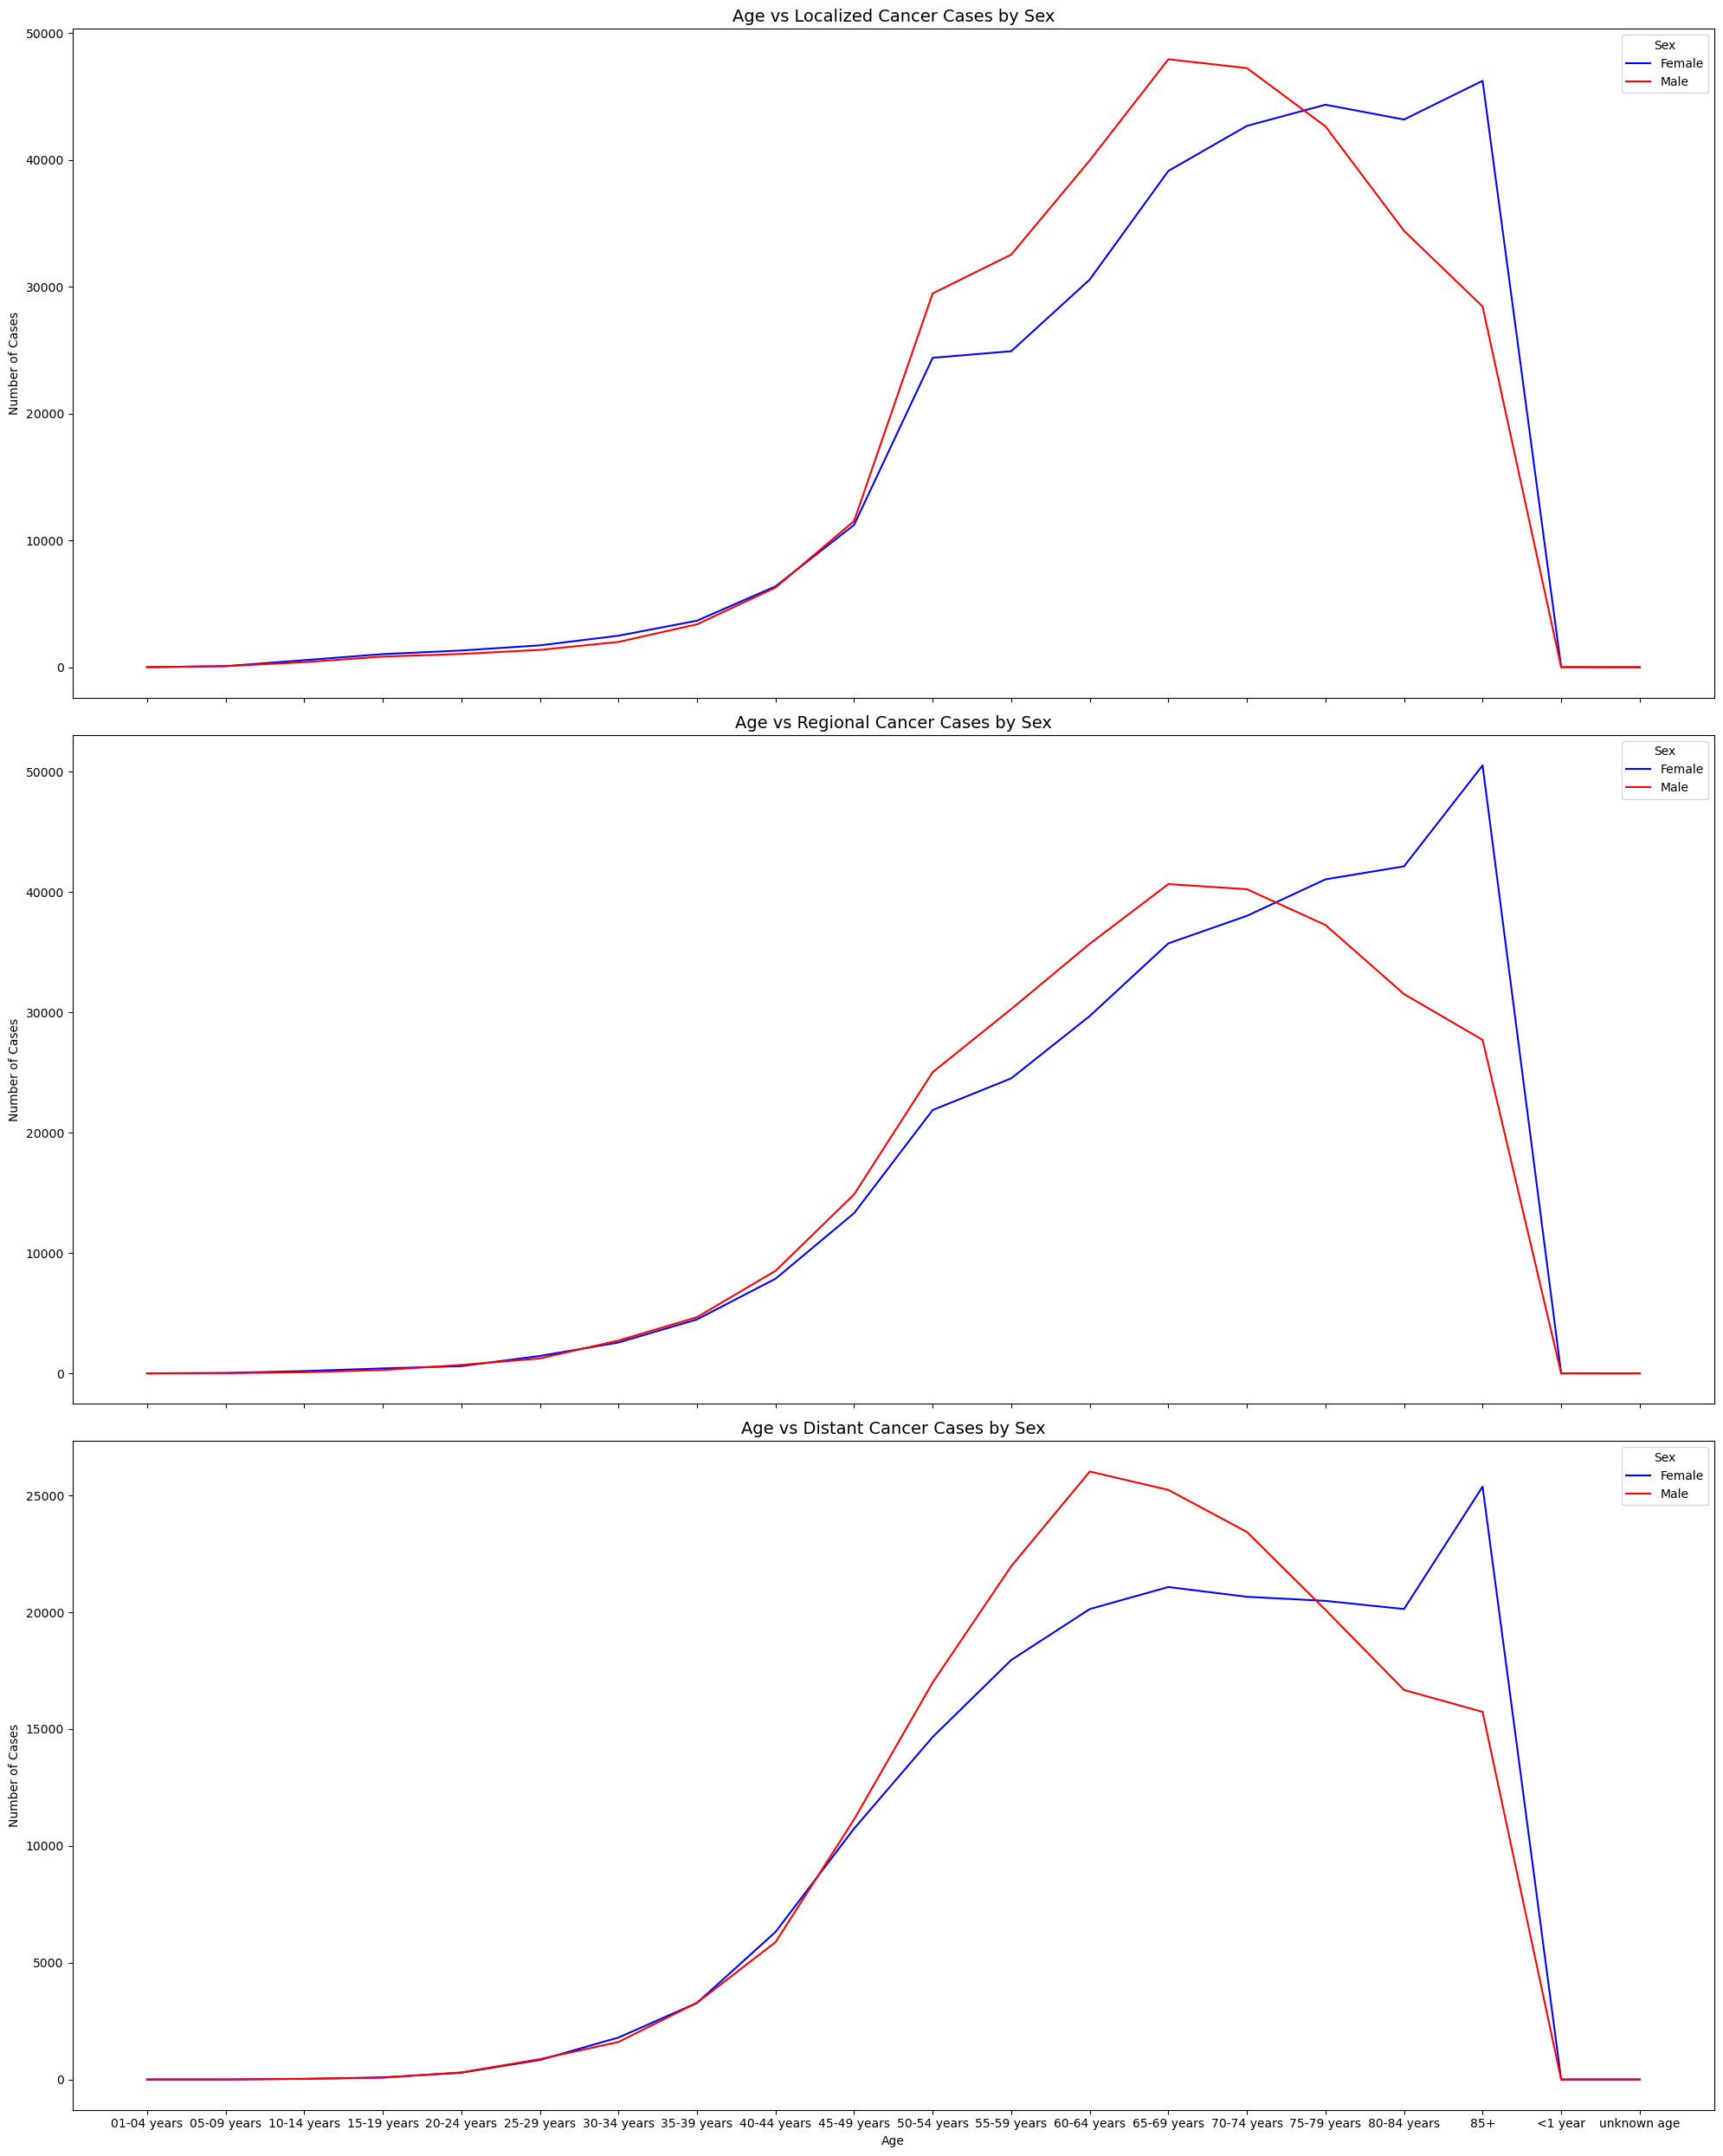

In [ ]:

# Aggregate cancer cases by sex and age for each stage
cancer_exposure = df_filtered.groupby(["Sex", "Age"])[["Localized", "Regional", "Distant"]].sum()
# Identify the age and sex group with the highest exposure for each stage)
# Reset index for easier plotting
cancer_exposure_reset = cancer_exposure.reset_index()
# Set up the figure
fig, axes = plt.subplots(3, 1, figsize=(20, 25), sharex=True)
# Titles for stages
stages = ["Localized", "Regional", "Distant"]
colors = ["blue", "orange", "red"]
# Plot data for each stage
for i, stage in enumerate(stages):
    sns.lineplot(
        data=cancer_exposure_reset, x="Age", y=stage, hue="Sex", ax=axes[i], palette=["blue", "red"]
    )
    axes[i].set_title(f"Age vs {stage} Cancer Cases by Sex", fontsize=14)
    axes[i].set_ylabel("Number of Cases")
    axes[i].legend(title="Sex")
# Set common labels
axes[-1].set_xlabel("Age")

# Save the trend line plot for total cases by age
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Haby:age_line_graphs.png"))
plt.close()

# Show plot
plt.tight_layout()
plt.show()

In [60]:
print("All visuals for cancer diagnoses by age have been saved to the 'output_data' folder.")

All visuals for cancer diagnoses by age have been saved to the 'output_data' folder.
